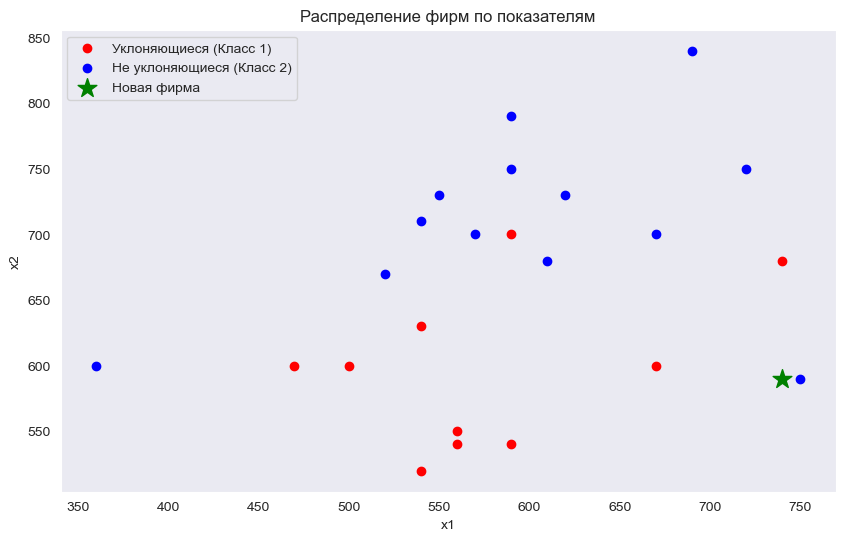

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загружаем данные
df = pd.read_csv('datas/firms_data.csv')

# Визуализация данных
plt.figure(figsize=(10, 6))
plt.scatter(df[df['class'] == 1]['x1'], df[df['class'] == 1]['x2'], color='red', label='Уклоняющиеся (Класс 1)')
plt.scatter(df[df['class'] == 2]['x1'], df[df['class'] == 2]['x2'], color='blue', label='Не уклоняющиеся (Класс 2)')
plt.scatter(740, 590, color='green', marker='*', s=200, label='Новая фирма')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Распределение фирм по показателям')
plt.legend()
plt.grid()
plt.show()

In [2]:
X = df[['x1', 'x2']]
y = df['class']

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Новая точка для классификации
new_point = np.array([[740, 590]])
new_point_scaled = scaler.transform(new_point)

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### SVM
svm_model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(new_point_scaled)
print(f"SVM предсказание для новой точки: {svm_pred[0]}")

### Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(new_point_scaled)
print(f"Naive Bayes предсказание для новой точки: {nb_pred[0]}")

### KNN
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(new_point_scaled)
print(f"KNN (k=7) предсказание для новой точки: {knn_pred[0]}")

# Влияние параметров
# Для SVM
for kernel in ['linear', 'rbf', 'poly']:
    model = svm.SVC(kernel=kernel)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"SVM с ядром {kernel}: точность = {acc:.2f}")

# Для KNN
for k in range(1, 17):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    print(f"KNN с k={k}: точность = {acc:.2f}")

/opt/anaconda3/envs/MOADJupyter/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


SVM предсказание для новой точки: 2
Naive Bayes предсказание для новой точки: 2
KNN (k=7) предсказание для новой точки: 1
SVM с ядром linear: точность = 0.71
SVM с ядром rbf: точность = 0.71
SVM с ядром poly: точность = 0.43
KNN с k=1: точность = 0.71
KNN с k=2: точность = 0.86
KNN с k=3: точность = 0.57
KNN с k=4: точность = 0.86
KNN с k=5: точность = 0.71
KNN с k=6: точность = 0.86
KNN с k=7: точность = 0.86
KNN с k=8: точность = 0.86
KNN с k=9: точность = 0.86
KNN с k=10: точность = 0.86
KNN с k=11: точность = 0.71
KNN с k=12: точность = 0.71
KNN с k=13: точность = 0.43
KNN с k=14: точность = 0.43
KNN с k=15: точность = 0.43
KNN с k=16: точность = 0.43
